In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM


In [4]:
plt.rcParams['figure.figsize'] = (12,10)
plt.rcParams['figure.dpi'] = 200

In [5]:
train = pd.read_csv('./data/Google_Stock_Price_Train.csv')
y = train.iloc[:,1:2].values

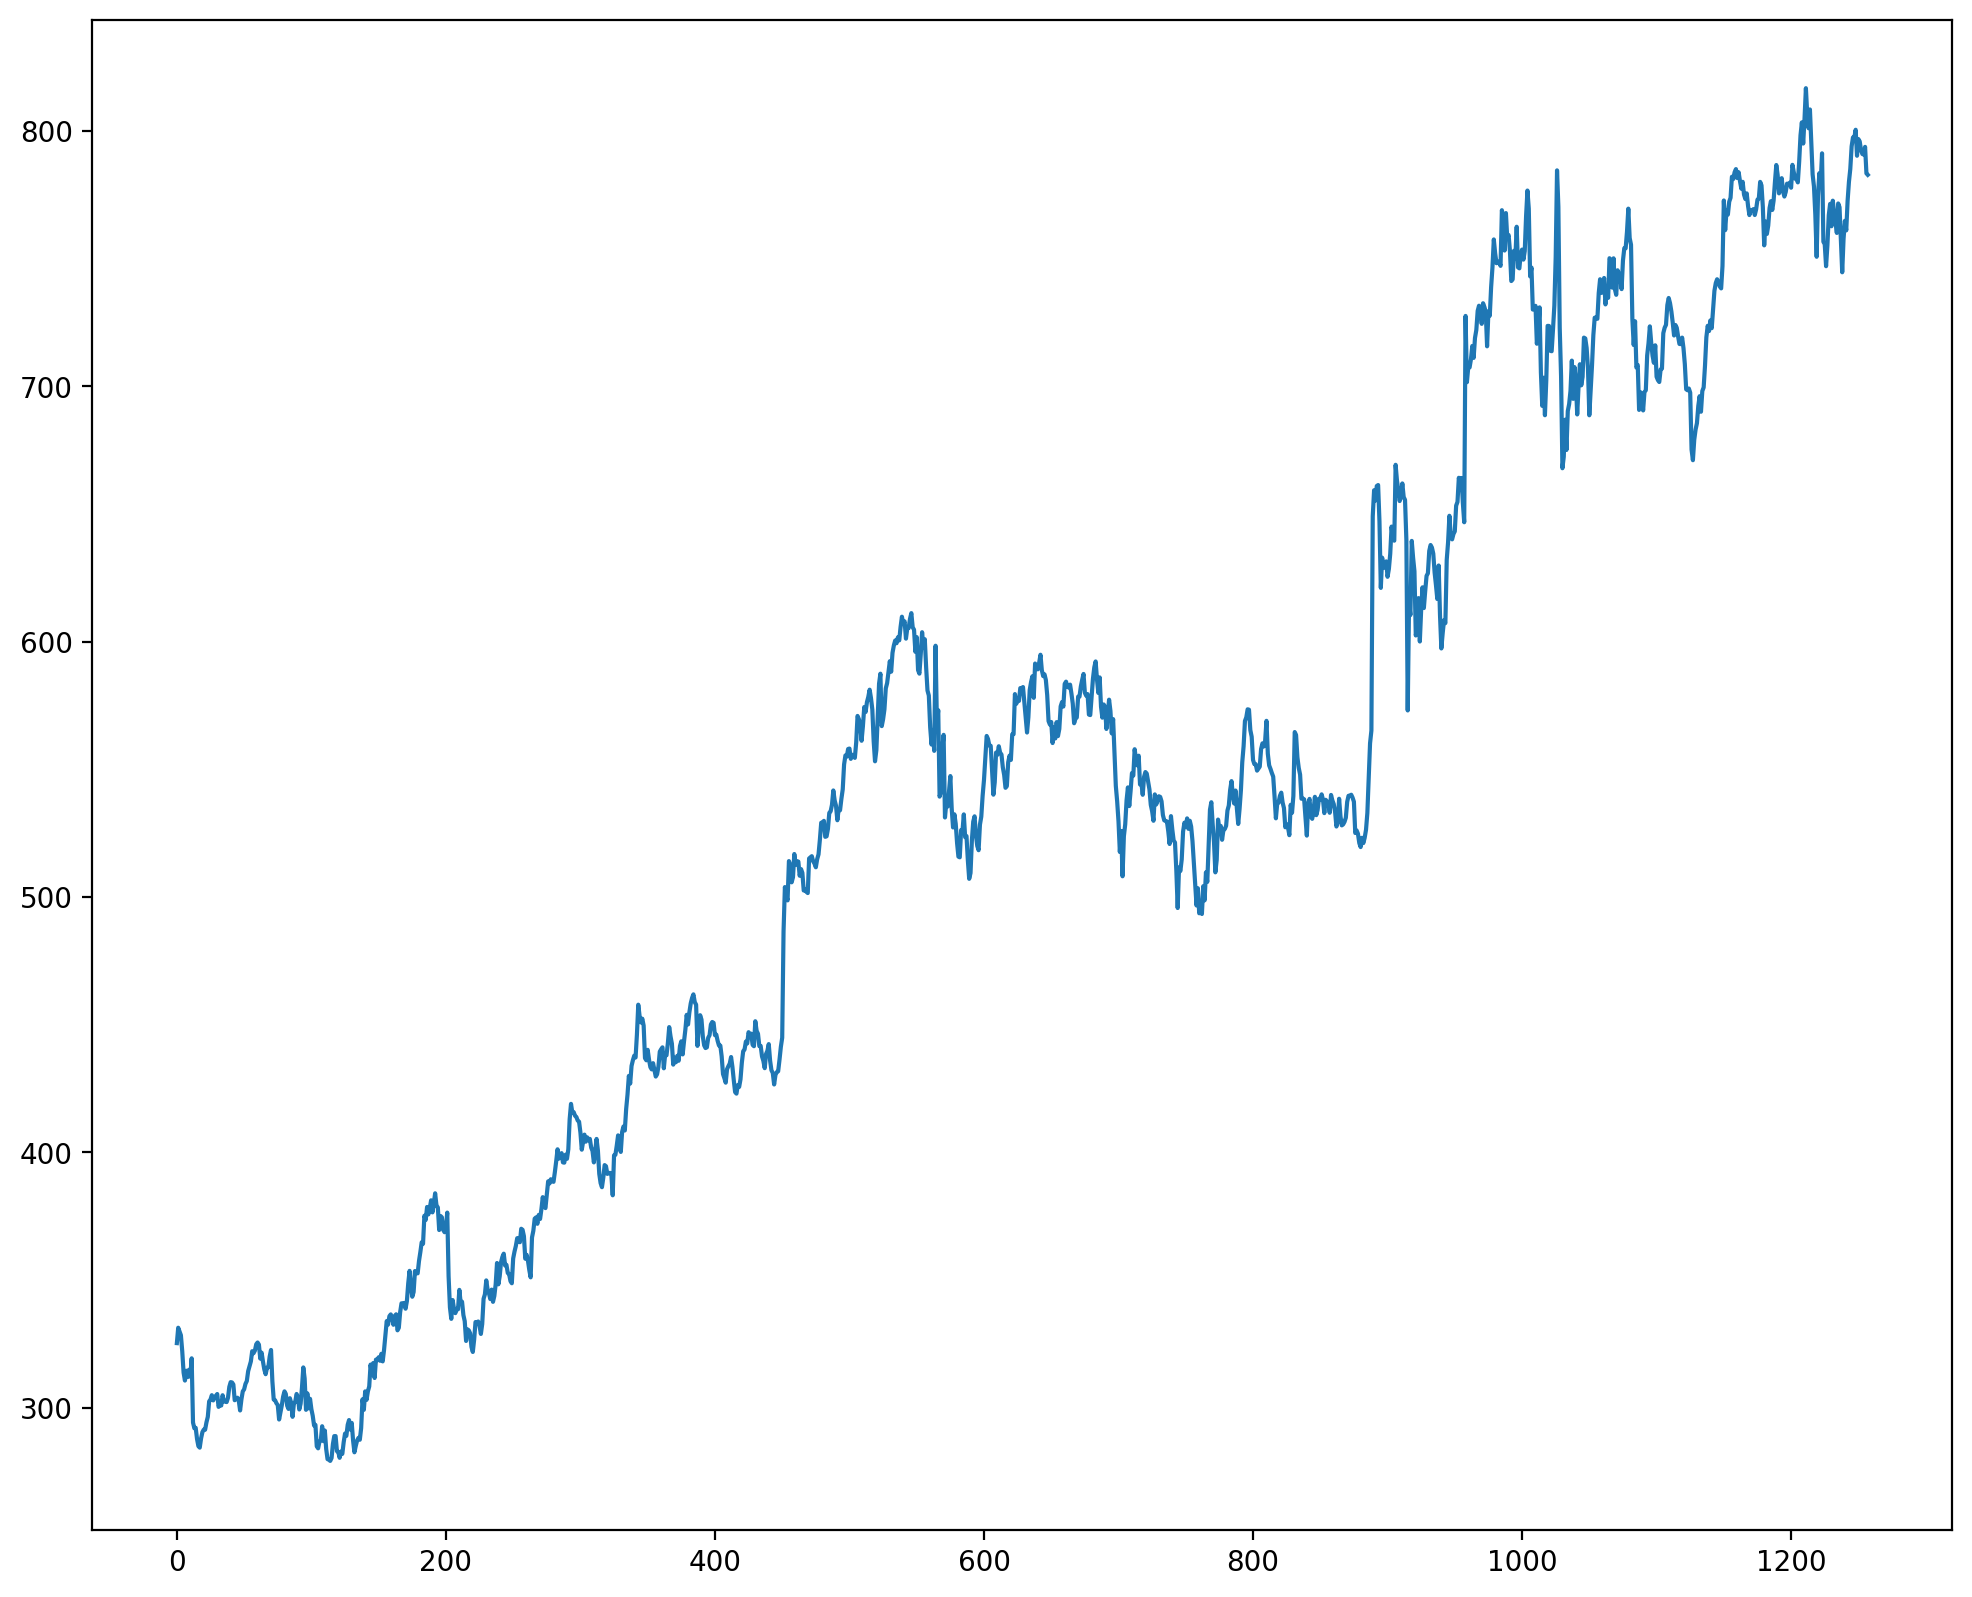

In [6]:
plt.plot(train['Open'])

In [7]:
sc = MinMaxScaler(feature_range=(0,1))
y_scaled = sc.fit_transform(y)

In [10]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(y_scaled[i-60:i,0])
    y_train.append(y_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [51]:
LSTM_model = Sequential()

In [52]:
LSTM_model.add(LSTM(units = 50, return_sequences = True,
                    input_shape = (X_train.shape[1], 1)))
LSTM_model.add(Dropout(0.2))

In [53]:
LSTM_model.add(LSTM(units = 50, return_sequences = True))
LSTM_model.add(Dropout(0.2))

In [54]:
LSTM_model.add(LSTM(units = 50, return_sequences = True))
LSTM_model.add(Dropout(0.2))

In [55]:
LSTM_model.add(LSTM(units = 50))
LSTM_model.add(Dropout(0.2))

In [57]:
LSTM_model.add(Dense(units = 1))
LSTM_model.compile(optimizer='adam', loss='mean_squared_error')
LSTM_model.fit(X_train,y_train,epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 20s 183ms/step - loss: 0.0476 - ETA: 4s - loss: 0.1176

In [58]:
test = pd.read_csv('./data/Google_Stock_Price_Test.csv')
real_stock_price = test.iloc[:, 1:2].values

In [75]:
total = pd.concat((train['Open'], test['Open']), axis = 0)
inputs = total[len(total) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = LSTM_model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

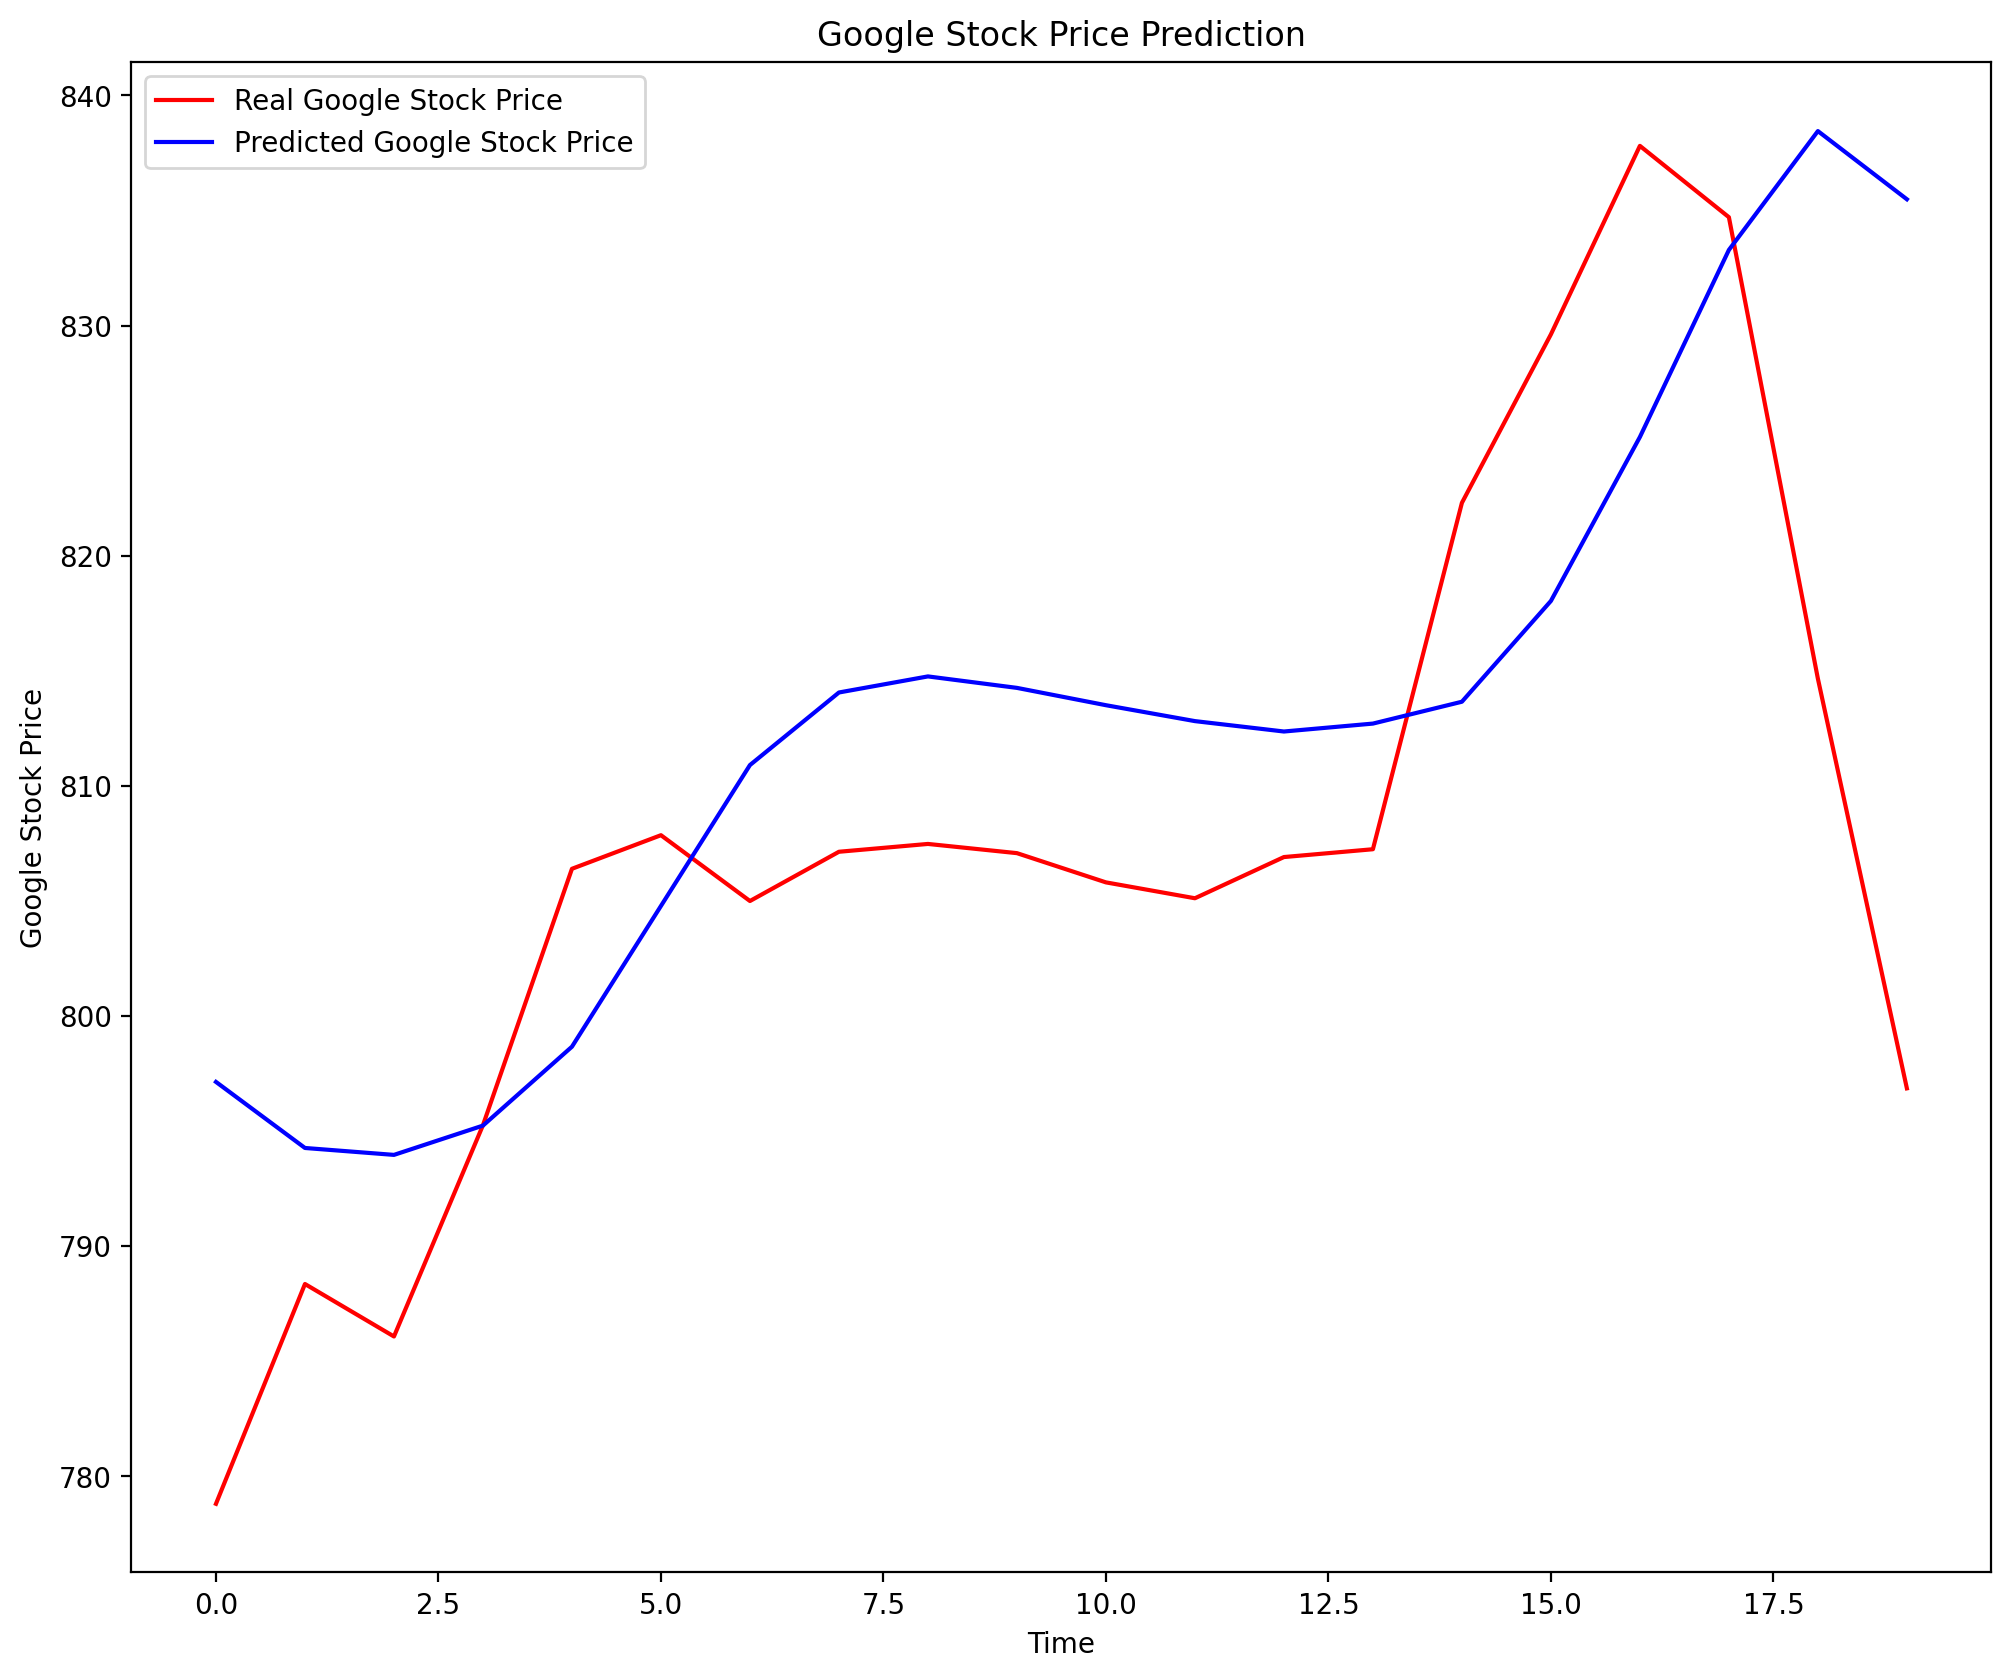

In [76]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()